# **Bags - Cost Predictive Model for ABC Industries using Multiple Linear Regression**
### By Divit Saini
![Image of baggage_dimensions_en_2](https://www.saudia.com/static_files/baggage/baggage_dimensions_en_2.png)


## Objective: 
The company wants to predict the cost they should set for a new variant of the kinds of bags based on the attributes mentioned below using **multiple linear regression model**:

1.	Height – The height of the bag
2.	Width – The width of the bag
3.	Length – The length of the bag
4.	Weight – The weight the bag can carry
5.	Weight1 – Weight the bag can carry after expansion

## Methodology:
The Steps that we are going to follow to complete this implementation is as follows:

1. Importing the necessary libraries.

2. Reading the dataset from the CSV file and searching for any pre-processsing required.

3. Discover and visualise data while finding correlations

4. Data Preprocessing

5. Splitting the dataset into independent (x) and dependent (y) variables.

6. Multiple linear regression model creation:
    1. Without feature scaling (Considering all independent variables (Attributes))
    2. Feature selection
        1. Forward selection
            1. Manual one by one addition
            2. Using Sequential Feature Selection Class
        2. Backward elimination
     
        3. Recursive Feature Elimination
        
7. Selection of Best Model using Performance Metrics such as R-2, adjusted R-2 and RMSE

## 1. Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Reading the dataset from the CSV file and searching for any pre-processsing required.

In [2]:
Htrain = pd.read_csv("Data_1.csv")
Htrain

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
# Printing the no of rows and columns
Htrain.shape 

(159, 6)

In [4]:
Htrain.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
# Getting the information about the dataset including missing values, datatype of attributes
Htrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


**Conclusion**: From here, we can clearly see that:
1. There are no missing values in the data.
2. After observing the range of the different atrributes, we can conclude that dataset **requires feature scaling** as the range of Weight (7.5 to 59) while Width (1 to 8). This step will be done after data visualisation.
3. There are no categorical variables present. Hence, no OneHotEncoding() required.


Hence, We can continue with visualising the data and finding correlations

## 3. Discover and visualise data while finding correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212F109E3D0>,
      dtype=object)

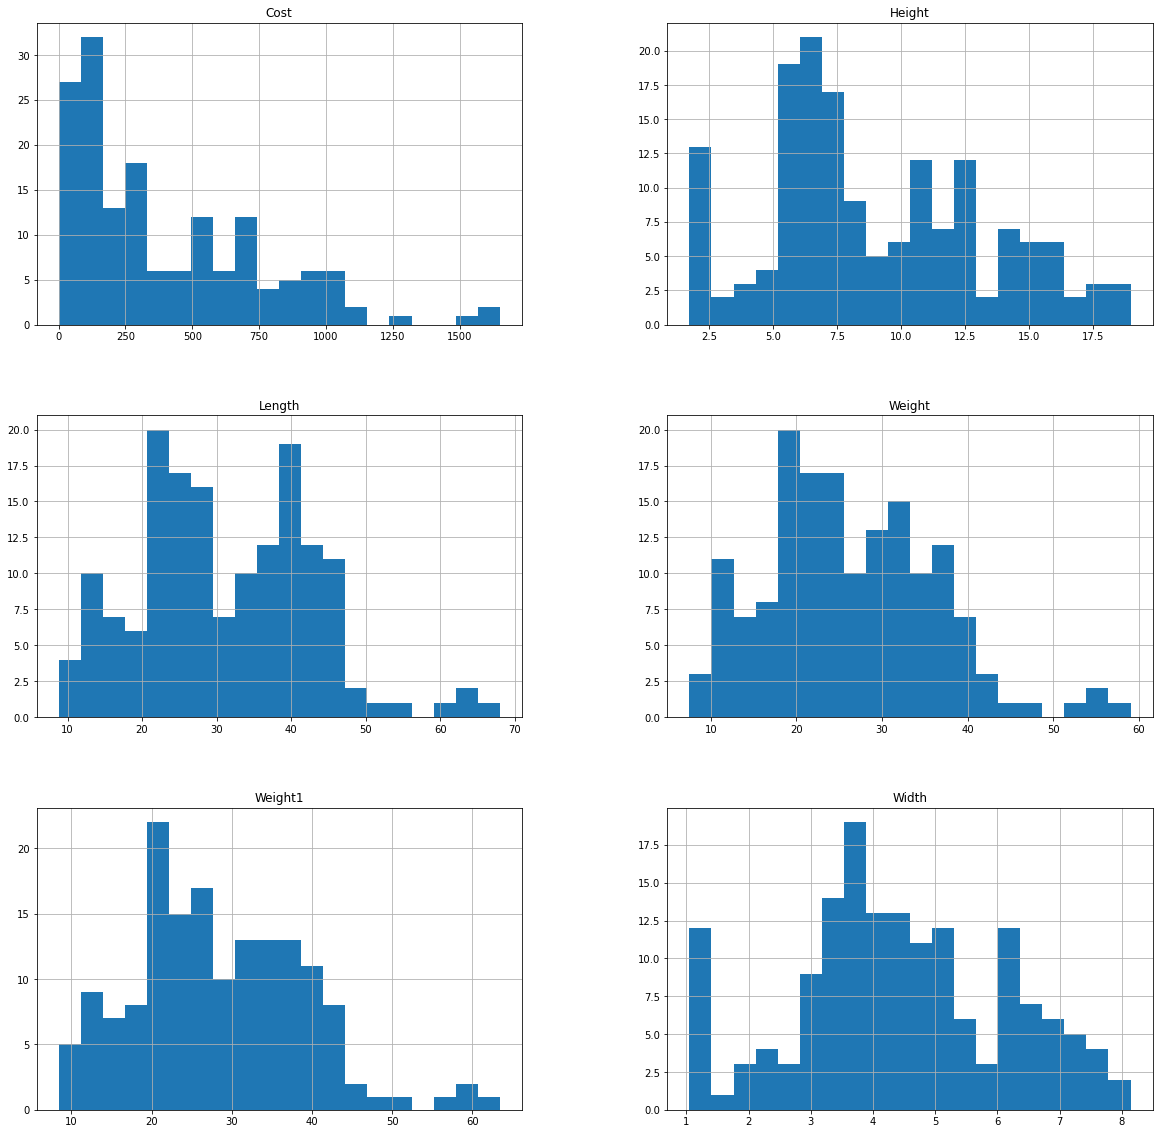

In [6]:
#duplicating the main dataset only for visualisation section purpose
H_vis = Htrain.copy()

#gives you the histogram for various attributes
H_vis.hist(bins=20, figsize = (20,20))

In [7]:
#creating a correlation matrix of all the features/attributes
corr_matrix = H_vis.corr()


In [8]:
#print the correlation of cost with all the independent variables
corr_matrix[['Cost']]

,Cost
Cost,1.000000
Weight,0.915712
Weight1,0.918618
Length,0.923044
Height,0.724345
Width,0.886507


Here, We can clearly see that **Cost - dependent variable** is very strongly related with all the **independent variables - (Height, width, length, Weight, weight 1)** (Correlation is higher than 0.8).  The maximum correlation is with the length (**0.923044**)

Hence multiple linear regression has to be performed 

In [9]:
corr_matrix

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Weight,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Weight1,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


From the above matrix, The following correlations will be shown graphically using a scatter plot:
1. Weight Vs Weight 1 (0.999517 - maximum +ve correlation among all possibilities)
2. Cost vs Length (0.923044 - maximum +ve correlation between dependent and independent variable)
3. Height vs Weight (0.635378 - minimum +ve correlation)
4. Cost vs Height (0.724345 - minimum +ve correlation between dependent and independent variable)

### 1. Weight Vs Weight1 (0.999517 - maximum)

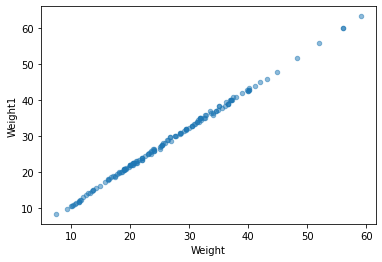

In [10]:
H_vis.plot(kind="scatter", x="Weight", y="Weight1",alpha=0.5)

### 2. Cost vs Length (0.923044 - maximum between dependent and independent variable)

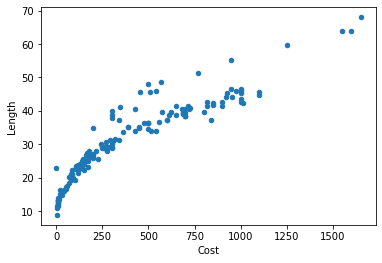

In [11]:
H_vis.plot(kind="scatter", x="Cost", y="Length",alpha=1)

### 3. Height vs Weight (0.635378 - minimum)

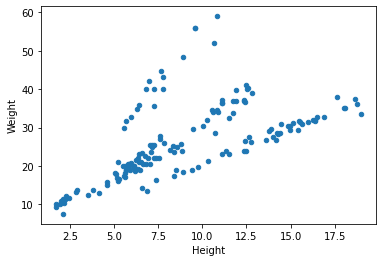

In [12]:
H_vis.plot(kind="scatter", x="Height", y="Weight",alpha=1)

### 4. Cost vs Height (0.724345 - minimum between dependent and independent variable)

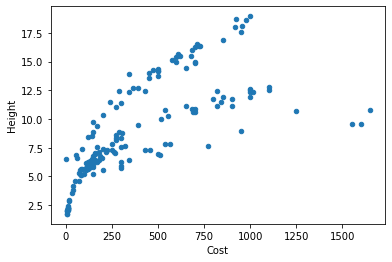

In [13]:
H_vis.plot(kind="scatter", x="Cost", y="Height",alpha=1)

## 4. Data Preprocessing: Feature Scaling

Standardising the independent variables as Machine learning algorithms don’t perform well when the input numerical attributes have
very different scales

In [14]:
#importing Standard scaler class fron sklearn preprocessing module
from sklearn.preprocessing import StandardScaler

#creating an object of the class StandardScaler
std_scaler = StandardScaler()

In [15]:
#separating independent variables to be scaled before training the data
X_unscaled = Htrain.drop('Cost', axis = 1)
X_unscaled

,Weight,Weight1,Length,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [16]:
std_scaler.fit(X_unscaled)

StandardScaler()

In [17]:
scaled_values = std_scaler.transform(X_unscaled)

#converting the array obtained of the scaled values to a dataframe
X_scaled = pd.DataFrame(scaled_values)

#Labelling the columns
X_scaled.columns = ['Weight', 'Weight1', 'Length', 'Height', 'Width']

X_scaled.describe()

,Weight,Weight1,Length,Height,Width
count,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02
mean,-1.564088e-16,-1.326682e-16,1.955110e-17,-9.496247e-17,-2.290271e-16
std,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00
min,-1.881310e+00,-1.873679e+00,-1.937763e+00,-1.695083e+00,-2.005294e+00
25%,-7.222480e-01,-6.941887e-01,-6.978805e-01,-7.082613e-01,-6.140072e-01
50%,-1.050852e-01,-1.044433e-01,-1.578620e-01,-2.773402e-01,-1.005570e-01
75%,6.475523e-01,6.631618e-01,7.277683e-01,7.945562e-01,6.944472e-01
max,3.286801e+00,3.274892e+00,3.177292e+00,2.337161e+00,2.216321e+00


In [18]:
X_scaled

,Weight,Weight1,Length,Height,Width
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...
154,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


## 5. Splitting the dataset into independent (x) and dependent (y) variables.

Independent Variables (X) = Weight, Weight 1, Height, Length, Width

Depnedent Variable (Y) = Cost (Which we want to predict)

In [19]:
#Independent variable traning set (X_train) is equal to the scaled values of X (X_scaled)
X_train = X_scaled.copy()
X_train.head()

,Weight,Weight1,Length,Height,Width
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.025372,0.054694,0.239592,0.812835,0.426371


In [20]:
X_train.shape

(159, 5)

In [21]:
#Dependent Variable
y_train = Htrain['Cost']
y_train

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Cost, Length: 159, dtype: float64

In [22]:
y_train.shape

(159,)

## 5. Multiple linear regression model creation

### A.  Without feature selectiom (Considering all independent variables (Attributes))

In [23]:
model_all = LinearRegression()

In [24]:
# multiple linear regression model is created by fit method of the class LineaRegression
model_all.fit(X_train, y_train)

LinearRegression()

In [25]:
# gives coefficients of various independent variables (i.e. column names of X_train)
model_all.coef_

array([ 621.36698553,  -69.72252823, -335.9401089 ,  120.90631145,
         37.76626234])

In [26]:
# creation of the dataframe of coefficient for better representation
model_all_coeff = pd.DataFrame(model_all.coef_)

#labelling column
model_all_coeff.columns = ['Coefficients after considering all attrinutes']

#'labelling rows = independent variable'
model_all_coeff.index = ['Weight', 'Weight1', 'Length', 'Height', 'Width']
model_all_coeff

,Coefficients after considering all attrinutes
Weight,621.366986
Weight1,-69.722528
Length,-335.940109
Height,120.906311
Width,37.766262


1. -ve coefficient means that there is an inverse correlation between independent variable and dependent variable

2. +ve coefficient means that directly proportional to independent variable

2. When we are predicting the coefficient of one indepen variable, other coefficients should be constant

In [27]:
#intercept of the model (C in y = m1x1 + m2x2 + ....+ mnxn + C)
model_all.intercept_

398.32641509433967

In [28]:
y_pred_train = model_all.predict(X_train)
y_pred_train[:5]

array([326.81612777, 369.57859339, 370.82418025, 439.05613854,
       444.16916821])

In [29]:
#converting the array obtained of the scaled values to a dataframe
y_pred_df = pd.DataFrame(y_pred_train)

#Labelling the columns
y_pred_df.columns = ['Cost_predicted']
y_pred_df

,Cost_predicted
0,326.816128
1,369.578593
2,370.824180
3,439.056139
4,444.169168
...,...
154,-160.608116
155,-145.535439
156,-137.843413
157,-83.279758


In [30]:
y_pred_df.describe()

,Cost_predicted
count,159.000000
mean,398.326415
std,336.820637
min,-250.771870
25%,160.588566
50%,370.824180
75%,671.304613
max,1265.843019


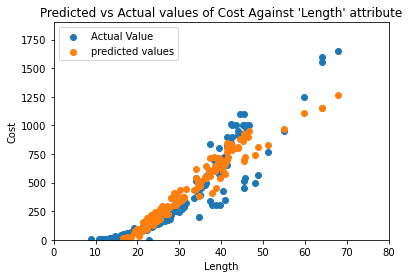

In [31]:

# scatter plot of the actual cost values w.rt. Length
plt.scatter(X_unscaled[['Length']], y_train, label = "Actual Value")

# Scatter plot of predicted cost values w.r.t. Length
plt.scatter(X_unscaled[['Length']], y_pred_train, label = "predicted values")

plt.axis([0,80,0,1900])
plt.xlabel('Length')

plt.ylabel('Cost')

plt.title("Predicted vs Actual values of Cost Against 'Length' attribute")

plt.legend()

plt.show()


Similarly, we can plot 2-D scatter plots for predicted cost and actual cost against different independent variables.

#### **Calculation of Performance metrics**

In [32]:
# R-squared Value
r2_all = model_all.score(X_train, y_train)
r2_all

0.8852867046546207

The better the linear regression fits the data in comparison to the simple average, the closer the value of R2 is to 1.

Here, R-Squared value here is pretty descent givinga good predictive model

In [33]:
#Root mean Squared Error
lin_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
lin_rmse

120.86305864300286

In [34]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model_s1 = sm.OLS( y_train, X)


r = model_s1.fit()

r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           4.95e-70
Time:                        14:39:19   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.3264      9.771     40.765      0.000     379.023     417.630
Weight       621.3670    400.678      1.551      0.123    -170.209    1412.943
Weight1      -69.7225    446.091     -0.156      0.876    -951.016     811.571
Length      -335.9401    200.838     -1.673      0.096    -732.713      60.833
Height       120.9063     37.297      3.242      0.001      47.222     194.591
Width         37.7663     34.235      1.103      0.272     -29.867     105.400
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
r.rsquared_adj

0.8815379041531377

### B.  Feature selection:

### 1. Forward Selection

The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

#### **1.1.  Manual one by one addition (Using R-2 as well as Adjusted R-2):**
In this delecton technique we take the first attribute and then keep on adding another one in each iteration to calculate the r-2 and Lmse values for comparison later. We do it until all the attributes are added.

**1.1.1. Model1 with "Weight"**

In [36]:
model1 = LinearRegression()
model1.fit(X_train[['Weight']],y_train)

LinearRegression()

In [37]:
model1.coef_

array([326.77247949])

In [38]:
model1.intercept_

398.32641509433967

In [39]:
r2_1 = model1.score(X_train[['Weight']],y_train)
r2_1

0.8385279468768119

In [40]:
y_pred_model1 = model1.predict(X_train[['Weight']])
y_pred_model1[:5]

array([298.40312322, 324.63685434, 321.35763795, 400.0588313 ,
       406.61726408])

In [41]:
lin_rmse_model1 = np.sqrt(mean_squared_error(y_train, y_pred_model1))
lin_rmse_model1

143.3954550126715

In [42]:
import statsmodels.api as sm
X = sm.add_constant(X_train[['Weight']])
model_s1 = sm.OLS( y_train, X)


r = model_s1.fit()

r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     815.3
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           4.75e-64
Time:                        14:39:19   Log-Likelihood:                -1015.1
No. Observations:                 159   AIC:                             2034.
Df Residuals:                     157   BIC:                             2040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.3264     11.444     34.806      0.000     375.722     420.931
Weight       326.7725     11.444     28.554      0.000     304.168     349.377
==============================================================================
Omnibus:                        9.385   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.768
Skew:                          -0.489   Prob(JB):                      0.00757
Kurtosis:                       3.721   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
adjusted_r2_1 = r.rsquared_adj
adjusted_r2_1

0.8374994624620146

**1.1.2. Model1 with "Weight" and "Weight1"**

In [44]:
model1 = LinearRegression()
model1.fit(X_train[['Weight','Weight1']],y_train)
r2_2 = model1.score(X_train[['Weight','Weight1']],y_train)
r2_2

0.8501409783114509

In [45]:
y_pred_model1 = model1.predict(X_train[['Weight','Weight1']])
y_pred_model1[:5]

array([327.29033958, 358.48355446, 390.79343385, 461.1992985 ,
       442.92709972])

In [46]:
lin_rmse_model1 = np.sqrt(mean_squared_error(y_train, y_pred_model1))
lin_rmse_model1

138.1427665432575

In [47]:
import statsmodels.api as sm
X = sm.add_constant(X_train[['Weight','Weight1']])
model_s1 = sm.OLS( y_train, X)


r = model_s1.fit()

r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     442.5
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           5.05e-65
Time:                        14:39:19   Log-Likelihood:                -1009.2
No. Observations:                 159   AIC:                             2024.
Df Residuals:                     156   BIC:                             2034.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.3264     11.060     36.014      0.000     376.479     420.174
Weight      -910.4083    355.999     -2.557      0.012   -1613.609    -207.207
Weight1     1237.7783    355.999      3.477      0.001     534.577    1940.979
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.842
Skew:                          -0.178   Prob(JB):                        0.656
Kurtosis:                       2.984   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
adjusted_r2_2 = r.rsquared_adj
adjusted_r2_2

0.8482197088026232

**1.1.3. Model1 with "Weight", "Weight1", "Length"**

In [49]:
model1 = LinearRegression()
model1.fit(X_train[['Weight','Weight1', 'Length']],y_train)
r2_3 = model1.score(X_train[['Weight','Weight1', 'Length']],y_train)
r2_3

0.8538011360752531

In [50]:
y_pred_model1 = model1.predict(X_train[['Weight','Weight1', 'Length']])
y_pred_model1[:5]

array([357.93431132, 392.16666789, 407.61214929, 474.88979819,
       473.852214  ])

In [51]:
lin_rmse_model1 = np.sqrt(mean_squared_error(y_train, y_pred_model1))
lin_rmse_model1

136.44533803713665

In [52]:
import statsmodels.api as sm
X = sm.add_constant(X_train[['Weight','Weight1', 'Length']])
model_s1 = sm.OLS( y_train, X)


r = model_s1.fit()

r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     301.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.77e-64
Time:                        14:39:19   Log-Likelihood:                -1007.2
No. Observations:                 159   AIC:                             2022.
Df Residuals:                     155   BIC:                             2035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.3264     10.960     36.345      0.000     376.677     419.976
Weight      -537.9097    400.244     -1.344      0.181   -1328.546     252.726
Weight1      640.9095    465.020      1.378      0.170    -277.685    1559.504
Length       225.8822    114.667      1.970      0.051      -0.629     452.394
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.577
Skew:                          -0.120   Prob(JB):                        0.749
Kurtosis:                       3.171   Cond. No.                         96.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
adjusted_r2_3 = r.rsquared_adj
adjusted_r2_3

0.8509714806444515

**1.1.4. Model1 with "Weight", "Weight1", "Length", "Height"**

In [54]:
model1 = LinearRegression()
model1.fit(X_train[['Weight','Weight1', 'Length', 'Height']],y_train)
r2_4 = model1.score(X_train[['Weight','Weight1', 'Length', 'Height']],y_train)
r2_4

0.8843742730162711

In [55]:
y_pred_model1 = model1.predict(X_train[['Weight','Weight1', 'Length', 'Height']])
y_pred_model1[:5]

array([325.36028573, 366.94732504, 362.76894098, 445.72362238,
       427.23509912])

In [56]:
lin_rmse_model1 = np.sqrt(mean_squared_error(y_train, y_pred_model1))
lin_rmse_model1

121.34278008786762

In [57]:
import statsmodels.api as sm
X = sm.add_constant(X_train[['Weight','Weight1', 'Length', 'Height']])
model_s1 = sm.OLS( y_train, X)


r = model_s1.fit()

r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     294.5
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           4.95e-71
Time:                        14:39:19   Log-Likelihood:                -988.59
No. Observations:                 159   AIC:                             1987.
Df Residuals:                     154   BIC:                             2003.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.3264      9.778     40.737      0.000     379.010     417.643
Weight       625.4655    400.943      1.560      0.121    -166.593    1417.524
Weight1       84.3661    423.957      0.199      0.843    -753.157     921.889
Length      -482.2375    150.933     -3.195      0.002    -780.403    -184.072
Height       152.5096     23.900      6.381      0.000     105.296     199.723
==============================================================================
Omnibus:                       15.163   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.975
Skew:                           0.642   Prob(JB):                     0.000125
Kurtosis:                       4.032   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
adjusted_r2_4 = r.rsquared_adj
adjusted_r2_4

0.8813710073803301

**1.1.5. Model1 with "Weight", "Weight1", "Length", "Height", "Width"**

In [59]:
model1 = LinearRegression()
model1.fit(X_train[['Weight','Weight1', 'Length', 'Height', 'Width']],y_train)
r2_5 = model1.score(X_train[['Weight','Weight1', 'Length', 'Height', 'Width']],y_train)
r2_5

0.8852867046546207

In [60]:
y_pred_model1 = model1.predict(X_train[['Weight','Weight1', 'Length', 'Height', 'Width']])
y_pred_model1[:5]

array([326.81612777, 369.57859339, 370.82418025, 439.05613854,
       444.16916821])

In [61]:
lin_rmse_model1 = np.sqrt(mean_squared_error(y_train, y_pred_model1))
lin_rmse_model1

120.86305864300286

In [62]:
import statsmodels.api as sm
X = sm.add_constant(X_train[['Weight','Weight1', 'Length', 'Height', 'Width']])
model_s1 = sm.OLS( y_train, X)


r = model_s1.fit()

r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           4.95e-70
Time:                        14:39:19   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.3264      9.771     40.765      0.000     379.023     417.630
Weight       621.3670    400.678      1.551      0.123    -170.209    1412.943
Weight1      -69.7225    446.091     -0.156      0.876    -951.016     811.571
Length      -335.9401    200.838     -1.673      0.096    -732.713      60.833
Height       120.9063     37.297      3.242      0.001      47.222     194.591
Width         37.7663     34.235      1.103      0.272     -29.867     105.400
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
adjusted_r2_5 = r.rsquared_adj
adjusted_r2_5

0.8815379041531377

**Creation of Adjusted R-squared values column in the Table for comparison**

In [64]:
#creation of a Dataframe using Dictionary
compare_dict = {'Features Used' : ["'Weight'", "'Weight','Weight1'", "'Weight','Weight1', 'Length'", "'Weight','Weight1', 'Length', 'Height'" , "'Weight','Weight1', 'Length', 'Height', 'Width'"], 'Num_features' : [1,2,3,4,5], 'R-Squared value' : [r2_1, r2_2, r2_3, r2_4, r2_5]}
Table_Comparison = pd.DataFrame(compare_dict)

#no of sample size
m = len(y_train)

#creation of a new column 'R_squared_adj'
Table_Comparison['R_squared_adj'] = 1 - ( (1 - Table_Comparison['R-Squared value'])*(m-1)/(m-Table_Comparison['Num_features'] -1))


Table_Comparison

,Features Used,Num_features,R-Squared value,R_squared_adj
0,'Weight',1,0.838528,0.837499
1,"'Weight','Weight1'",2,0.850141,0.848220
2,"'Weight','Weight1', 'Length'",3,0.853801,0.850971
3,"'Weight','Weight1', 'Length', 'Height'",4,0.884374,0.881371
4,"'Weight','Weight1', 'Length', 'Height', 'Width'",5,0.885287,0.881538


The table above is used for comparison of different attributes which were added one by one.
we can compare the different attributes in each step by looking at the variation of R-2 score.

**Observation: **
In this case, 
1. when **'WIDTH'** was added after 'Height', there was no significant variation in R-2 score as well as **Adjusted R-2 score** . 
2. when **'Length'** was added after 'Weight1', there was no significant variation in R-2 score as well as **Adjusted R-2 score**.
Hence, they can be discared for future calculation.

**Conclusion:**
The parameters selected from forward addition are: **'Weight', 'Weight1', 'Height'**.
But we move on to using the Sequential Feature Selection Class which is much more reliable than manual forward addition and it is based on R-squared scoring.

#### OR

#### 1.2. Using Sequential Feature Selection Class from mlxtend.feature_selction module

In [65]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


**SequentialFeatureSelector()** function accepts the following major arguments :

1. **LinearRegression()** as an estimator for the entire process. Similarly, it can be any classification based algorithm.

2. **k_features** indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

3. **forward** and **floating** arguments for different flavors of wrapper methods, here, **forward = True** and **floating = False** are for forward selection technique.

4. **Scoring argument** specifies the evaluation criterion to be used. For regression problems, there is only **r2** score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

5. **cv** argument is for k-fold cross-validation.

[Reference_Hyperlink](https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f)

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector

#
SFS = SequentialFeatureSelector(LinearRegression(), k_features = 4, forward = True, floating = False, scoring = 'r2', cv = 0)

# applying the Forward selection technique to the dataset
SFS.fit(X_train, y_train)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=4,
                          scoring='r2')

In [67]:
# Gives the key features
SFS.k_feature_names_

('Weight', 'Length', 'Height', 'Width')

In [68]:
# Gives the key features selected by the technique after comparing the R-quared values
r2_sfs = SFS.k_score_
r2_sfs

0.8852683890437998

I tried with three cases:
1. **k_features = 5**,  gives the r-square score of 0.8852867046546207
2. **k_features = 4**,  gives the r-square score of 0.8852683890437998
3. **k_features = 3**, gives the r-square score of 0.8778407913853106

Hence, we choose the number of features to be selected as 4 as the variation was huge if it was 3 and no difference if it was 5. Here, Weight1 was dropped from the main dataset.

In [69]:
#Transforming the dataset to the key features only ranked based on the r-squared scoring
X_train_sfs_f = SFS.transform(X_train)

X_train_sfs_f_df = pd.DataFrame(X_train_sfs_f)

X_train_sfs_f_df.columns = ['Weight', 'Length', 'Height', 'Width']


X_train_sfs_f_df

,Weight,Length,Height,Width
0,-0.305789,-0.106020,0.596579,-0.236529
1,-0.225507,-0.002337,0.821261,-0.066579
2,-0.235542,-0.010977,0.797341,0.165793
3,0.005302,0.196390,0.879771,0.022621
4,0.025372,0.239592,0.812835,0.426371
...,...,...,...,...
154,-1.479903,-1.540309,-1.610359,-1.799403
155,-1.459833,-1.531669,-1.530878,-1.873547
156,-1.419692,-1.505748,-1.566687,-1.881402
157,-1.309305,-1.384784,-1.427243,-1.398568


In [70]:
#creating the multiple linear regrression model for the selected attributes
model1 = LinearRegression()

model1.fit(X_train_sfs_f_df, y_train)

r2_sfs_f = model1.score(X_train_sfs_f_df, y_train)
r2_sfs_f

0.8852683890437998

In [71]:
#Intercept C in the multiple linear regression Equation
model1.intercept_

398.32641509433967

In [72]:
model1.coef_

array([ 565.38848272, -348.7203526 ,  121.57902204,   36.09084694])

In [73]:
# creation of the dataframe of coefficient for better representation
model_1_coeff_sfs_f = pd.DataFrame(model1.coef_)

#labelling column
model_1_coeff_sfs_f.columns = ['Coefficients obtained After forward Selection']

#'labelling rows = independent variable'
model_1_coeff_sfs_f.index = ['Weight', 'Length', 'Height', 'Width']
model_1_coeff_sfs_f

,Coefficients obtained After forward Selection
Weight,565.388483
Length,-348.720353
Height,121.579022
Width,36.090847


In [74]:
#Calculation of predicted cost values by the model
y_pred_train_sfs_f = model1.predict(X_train_sfs_f_df)
y_pred_train_sfs_f[:5]

array([326.40340862, 369.08723052, 371.90493603, 440.6168111 ,
       443.33272981])

In [75]:
#Calculation of RMSE
lin_rmse_sfs_f = np.sqrt(mean_squared_error(y_train, y_pred_train_sfs_f))
lin_rmse_sfs_f

120.87270701193734

In [76]:
#converting the array obtained of the scaled values to a dataframe
y_pred_sfs_f_df = pd.DataFrame(y_pred_train_sfs_f)

#Labelling the columns
y_pred_sfs_f_df.columns = ['Cost_sfs_prediction']
y_pred_sfs_f_df

,Cost_sfs_prediction
0,326.403409
1,369.087231
2,371.904936
3,440.616811
4,443.332730
...,...
154,-161.984398
155,-146.662612
156,-137.643752
157,-83.035704


#### **Conclusion for Forward Selection:**

We choose the SequentialFeatureSelection technique because of it's built-in implementation for forward selection and gives a **r-squared value of 0.8852683890437998** and **RMSE = 120.87270701193734**


### 2. Backward Elimination

The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.

Note: We can manually remove the features one by one and calculate the r-2 and adjusted r-2 for the same. Basically, it is the vice versa of frward addition done above. Hence, I will be using SequentialFeatureSelector() function only for backward elimination

This is also done by SequentialFeatureSelector() function in the mlxtend library.

Key changes compared to Forward Selection include: **forward = False**

In [77]:
from mlxtend.feature_selection import SequentialFeatureSelector

#Creating an object of class SequentialFeatureSelector for backward elimination 
SFS_b = SequentialFeatureSelector(LinearRegression(), k_features = 3, forward = False, floating = False, scoring = 'r2', cv = 0)

# applying the backward Selection technique to the dataset
SFS_b.fit(X_train, y_train)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=3, scoring='r2')

In [78]:
# Gives the key features selected by the technique after comparing the R-quared values
SFS_b.k_feature_names_

('Weight', 'Length', 'Height')

In [79]:
r2_sfs_b = SFS_b.k_score_
r2_sfs_b

0.8843445409517305

I tried with three cases:
1. **k_features = 4**,  gives the r-square score of 0.8852683890437998
2. **k_features = 3**, gives the r-square score of 0.8843445409517305
3. **k_features = 2**,  gives the r-square score of 0.8763117539819553

Hence, we choose the number of features to be selected as 3 as the variation was huge if it was 2 and no significant difference if it was 4. Here, Weight1 and Width was dropped from the main dataset.

In [80]:
#Transforming the dataset to the key features only ranked based on the r-squared scoring
X_train_sfs_b = SFS_b.transform(X_train)

X_train_sfs_b_df = pd.DataFrame(X_train_sfs_b)

X_train_sfs_b_df.columns = ['Weight', 'Length', 'Height']


X_train_sfs_b_df

,Weight,Length,Height
0,-0.305789,-0.106020,0.596579
1,-0.225507,-0.002337,0.821261
2,-0.235542,-0.010977,0.797341
3,0.005302,0.196390,0.879771
4,0.025372,0.239592,0.812835
...,...,...,...
154,-1.479903,-1.540309,-1.610359
155,-1.459833,-1.531669,-1.530878
156,-1.419692,-1.505748,-1.566687
157,-1.309305,-1.384784,-1.427243


In [81]:
#creating the multiple linear regrression model for the selected attributes
model2 = LinearRegression()

model2.fit(X_train_sfs_b_df, y_train)

r2_sfs_b = model2.score(X_train_sfs_b_df, y_train)
r2_sfs_b

0.8843445409517305

In [82]:
#Intercept C in the multiple linear regression Equation
model2.intercept_

398.32641509433967

In [83]:
model2.coef_

array([ 700.80776263, -473.79897282,  153.48796233])

In [84]:
# creation of the dataframe of coefficient for better representation
model_2_coeff_sfs_b = pd.DataFrame(model2.coef_)

#labelling column
model_2_coeff_sfs_b.columns = ['Coefficients obtained After Backward Elimination']

#'labelling rows = independent variable'
model_2_coeff_sfs_b.index = ['Weight', 'Length', 'Height']
model_2_coeff_sfs_b

,Coefficients obtained After Backward Elimination
Weight,700.807763
Length,-473.798973
Height,153.487962


In [85]:
#Calculation of predicted cost values by the model
y_pred_train_sfs_b = model2.predict(X_train_sfs_b_df)
y_pred_train_sfs_b[:5]

array([325.82732706, 367.44991568, 360.83963775, 444.02670856,
       427.34939496])

In [86]:
#Calculation of RMSE value
lin_rmse_sfs_b = np.sqrt(mean_squared_error(y_train, y_pred_train_sfs_b))
lin_rmse_sfs_b

121.35838016047664

In [87]:
#converting the array obtained of the scaled values to a dataframe
y_pred_sfs_b_df = pd.DataFrame(y_pred_train_sfs_b)

#Labelling the columns
y_pred_sfs_b_df.columns = ['Cost_sfs_B_prediction']
y_pred_sfs_b_df

,Cost_sfs_B_prediction
0,325.827327
1,367.449916
2,360.839638
3,444.026709
4,427.349395
...,...
154,-156.174941
155,-134.003848
156,-123.650447
157,-82.200328


#### **Conclusion:**

SequentialFeatureSelection technique for backward elimination gives a **r-squared value of 0.8843445409517305** and **RMSE = 121.35838016047664** by selecting the following features **('Weight', 'Length', 'Height')**

### Recursive Feature elimination

Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

In [88]:
#importing the class RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE

# creation of an object of the class linearRegression
model3 = LinearRegression()

# creation of an object of the class RFE
rfe = RFE(estimator=model3, step=1,verbose=2)

In [89]:
X_train

,Weight,Weight1,Length,Height,Width
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...
154,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


In [90]:
#RFE technique BEING APPLIED
rfe.fit(X_train, y_train)  

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


RFE(estimator=LinearRegression(), verbose=2)

In [91]:
#ranking of different features based on a performance metric 
rfe.ranking_

array([1, 3, 1, 2, 4])

In [92]:
#Printing the slected Features by ranking them
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Weight,1
2,Length,1
3,Height,2
1,Weight1,3
4,Width,4


In [93]:
#Transforming the x_train based on the RFE selected features
X_train_rfe = rfe.transform(X_train)

X_train_rfe.shape

(159, 2)

Only features with Rank 1 has been selected i.e. WEIGHT and LENGTH

In [94]:
#model creation using the selected features and y_train
model_rfe = model3.fit(X_train_rfe, y_train)

In [95]:
model_rfe.coef_

array([  0.53719092, 328.85594377])

In [96]:
# creation of the dataframe of coefficient for better representation
model_coeff_rfe = pd.DataFrame(model_rfe.coef_)

#labelling column
model_coeff_rfe.columns = ['Coefficients obtained After RFE']

#'labelling rows = independent variable'
model_coeff_rfe.index = ['Weight', 'Length']
model_coeff_rfe

,Coefficients obtained After RFE
Weight,0.537191
Length,328.855944


In [97]:
model_rfe.intercept_

398.3264150943396

In [98]:
r2_rfe = model_rfe.score(X_train_rfe, y_train)
r2_rfe

0.8520094484533169

In [99]:
y_pred_train_rfe = model3.predict(X_train_rfe)
y_pred_train_sfs_b[:5]

array([325.82732706, 367.44991568, 360.83963775, 444.02670856,
       427.34939496])

In [100]:
lin_rmse_rfe = np.sqrt(mean_squared_error(y_train, y_pred_train_rfe))
lin_rmse_rfe

137.27887044533026

In [101]:
#converting the array obtained of the scaled values to a dataframe
y_pred_rfe_df = pd.DataFrame(y_pred_train_rfe)

#Labelling the columns
y_pred_rfe_df.columns = ['Cost_rfe_prediction']
y_pred_rfe_df

,Cost_rfe_prediction
0,363.296765
1,397.436842
2,394.590039
3,462.913320
4,477.131165
...,...
154,-109.008447
155,-106.156253
156,-97.610452
157,-57.771377


#### **Conclusion:**

Recursive Feature Elimination technique gives a **r-squared value of 0.8520094484533169** and **RMSE =137.27887044533026** by selecting the following features **('Weight', 'Length')**

## 7. Selection of Best Model using Performance Metrics such as R-2, adjusted R-2 and RMSE

In [102]:
Overall_Dictionary = { 'Techniques used' : ['Modelling based on all attributes', 'Forward Selection', 'Backward Elimination', 'Recursive Feature Elimination'], 'Features Considered': ["'Weight', 'Weight1', 'Length', 'Height', 'Width'", "'Weight', 'Length', 'Height', 'Width'" , "'Weight', 'Length', 'Height'", "'Weight', 'Length'"],'Num_features' : [5,4,3,2], 'R-squared Value': [round(r2_all,3),round(r2_sfs_f,3),round(r2_sfs_b,3),round(r2_rfe,3) ]}

Table_compare = pd.DataFrame(Overall_Dictionary)


#creation of a adjusted r-square column and RMSE column
m=len(y_train) # no of sample size
Table_compare['R_squared_adj'] = 1 - ( (1 - Table_compare['R-squared Value'])*(m-1)/(m-Table_compare['Num_features'] -1))

Table_compare['RMSE Value'] = [round(lin_rmse,3),round(lin_rmse_sfs_f,3),round(lin_rmse_sfs_b,3),round(lin_rmse_rfe,3) ]

Table_compare

,Techniques used,Features Considered,Num_features,R-squared Value,R_squared_adj,RMSE Value
0,Modelling based on all attributes,"'Weight', 'Weight1', 'Length', 'Height', 'Width'",5,0.885,0.881242,120.863
1,Forward Selection,"'Weight', 'Length', 'Height', 'Width'",4,0.885,0.882013,120.873
2,Backward Elimination,"'Weight', 'Length', 'Height'",3,0.884,0.881755,121.358
3,Recursive Feature Elimination,"'Weight', 'Length'",2,0.852,0.850103,137.279


From the above table, The best COST predictive multiple linear regression model that was chosen out of the 4 techniques was the one modelled using **'Backward Elimination'**.

This was chosen for the following reason:

By Comparing the different techniques used, the model using backward elimination gave the R-squared, adjusted R-2 and RMSE vales very close to the maximum ones by considering only 3 attributes **(Weight', 'Length', 'Height')**. This reduces our processing time and still give a good predictive cost value compared to Forward Selection.

### Summary of the model selected:

In [103]:
print("Cost = {}*'Weight' + ({})*'Length' + {}*'Height' + {}".format(round(model_2_coeff_sfs_b['Coefficients obtained After Backward Elimination']['Weight'],3),round(model_2_coeff_sfs_b['Coefficients obtained After Backward Elimination']['Length'],3),round(model_2_coeff_sfs_b['Coefficients obtained After Backward Elimination']['Height'],3),round(398.32641509433967,3) ))

Cost = 700.808*'Weight' + (-473.799)*'Length' + 153.488*'Height' + 398.326


**Remember :** ADD the standardised values of the features to get the accurate prediction